# Setup

## installing dependencies

In [163]:
# !pip install tensorflow

In [164]:
# !pip install opencv-python matplotlib

In [165]:
# !pip install --upgrade pip

## Importing dependencies

In [166]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [167]:
# plt.imshow??

In [168]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten

In [169]:
import tensorflow as tf

## crating seperate folder structure for data 

In [170]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [171]:
# import os

# # making the directories
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

## Collecting the data, positive and negative anchors

In [172]:
# import os
# for directory in os.listdir('lfw'):
#     for file in os.listdir(os.path.join('lfw', directory)):
#         EX_PATH = os.path.join('lfw', directory, file)
#         NEW_PATH = os.path.join(NEG_PATH, file)
# #         print(EX_PATH)
#         os.replace(EX_PATH, NEW_PATH)
# #         shutil.move(EX_PATH, NEG_PATH)


In [173]:
# os.listdir('lfw')

In [185]:
cap = cv2.VideoCapture(0)
import uuid

while cap.isOpened():
    
    ret, frame = cap.read()
    frame = frame[100:100+250, 200:200+250,:]

    if cv2.waitKey(1) & 0XFF == ord('a'):
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        
    if cv2.waitKey(1) & 0XFF == ord('p'):
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
    cv2.imshow('Image Collection', frame)
    
cap.release()
cv2.destroyAllWindows()

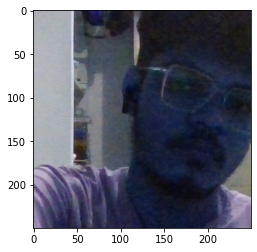

In [175]:
plt.imshow(frame)

# preprocessing the collected images 

## get image directories

In [220]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

In [240]:
ANC_PATH+'\*.jpg'

'data\\anchor\\*.jpg'

In [241]:
dir_test = anchor.as_numpy_iterator()
dir_test = dir_test.next()
dir_test

b'data\\anchor\\3e214f49-2bb9-11ee-b309-204ef6489e9c.jpg'

In [242]:
# import numpy as np
# from PIL import Image
# # plt.imshow()
# image = Image.open('data\\anchor\\6273d927-2ba8-11ee-86fa-204ef6489e9c.jpg')
# np.array(dir_test)

In [244]:
def preprocess(file_path):
    
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    
    return img

In [246]:
# preprocess(dir_test)

In [247]:
# creating the dataset

positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)


In [248]:
sample = data.as_numpy_iterator()

In [249]:
eg = sample.next()
eg

(b'data\\anchor\\f4a6b971-2bb8-11ee-affa-204ef6489e9c.jpg',
 b'data\\positive\\b28fdf55-2bba-11ee-a888-204ef6489e9c.jpg',
 1.0)

### splitting into train and test

In [252]:
def preprocess_twin(input_img, validation_img, label):
    return (preprocess(input_img) , preprocess(validation_img) , label)

In [253]:
preprocess_twin(*eg)

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.5627451 , 0.527451  , 0.46862745],
         [0.55490196, 0.51862746, 0.4627451 ],
         [0.5615196 , 0.51642156, 0.46936274],
         ...,
         [0.5120098 , 0.50808823, 0.5394608 ],
         [0.5480392 , 0.5441176 , 0.56960785],
         [0.5877451 , 0.57598037, 0.60343134]],
 
        [[0.5605392 , 0.5213235 , 0.4762255 ],
         [0.56789213, 0.5264706 , 0.48161766],
         [0.56960785, 0.52230394, 0.4759804 ],
         ...,
         [0.45318627, 0.43946078, 0.47132352],
         [0.5441176 , 0.5245098 , 0.55196077],
         [0.5897059 , 0.5681372 , 0.5955882 ]],
 
        [[0.5767157 , 0.5375    , 0.4982843 ],
         [0.57965684, 0.5375    , 0.49926472],
         [0.5801471 , 0.53210783, 0.4879902 ],
         ...,
         [0.41446078, 0.39485294, 0.41936275],
         [0.44166666, 0.42058823, 0.44509804],
         [0.5301471 , 0.5056372 , 0.5242647 ]],
 
        ...,
 
        [[0.6382353 , 0.45784312